In [11]:
!pip install numpy pandas matplotlib seaborn scikit-learn flask imbalanced-learn requests chart-studio


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [18]:
# Creating a sample dataset
X = [[1], [2], [3], [4], [5]]
y = [0, 0, 0, 1, 1]

# Check class distribution before balancing
print("Original class distribution:", np.bincount(y))


Original class distribution: [3 2]


In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Resampled class distribution:", np.bincount(y_resampled))


Resampled class distribution: [3 3]


In [24]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [26]:
# Train Random Forest Model
clf = RandomForestClassifier(
    random_state=42,
    n_estimators=30,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    max_samples=0.8
)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.50


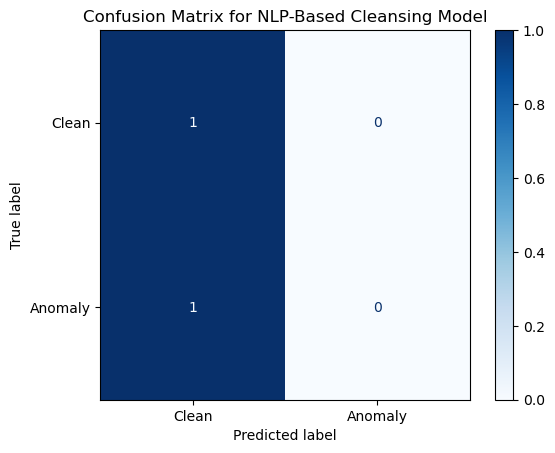

In [28]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Clean", "Anomaly"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for NLP-Based Cleansing Model")
plt.show()


In [30]:
# Save the trained model
with open("deployed_model.pkl", "wb") as file:
    pickle.dump(clf, file)

print("Model saved as 'deployed_model.pkl'")


Model saved as 'deployed_model.pkl'


In [43]:
import requests

url = "http://127.0.0.1:5000/predict"
data = {"features": [2.5]}
response = requests.post(url, json=data)
print(response.json())


{'prediction': 0}
